# 2_ Predicción

In [11]:
from unetseg.predict import PredictConfig, predict
from unetseg.evaluate import plot_data_results
import os
from tqdm import tqdm
import subprocess
import glob

In [12]:
#General

BUCKET_IMG = f"gs://dym-workshops-public/session2//informal-settlements-sentinel2-RGBNIR/imagenes_pred/*.tif" #CHECK

BASE_PATH = "./../"
PATH_PREDICT_IMAGES = f'/images_sentinel2_RGBNIR_for_prediction/'

ZONE         = "honduras"
YEAR_PREDICT = "2020"

SIZE = 160 
STEP_SIZE = SIZE 

MODEL_NAME = f'UNet_160x160_sentinel2_4D_classA_v0.h5'

BUCKET_MODEL = f"gs://dym-workshops-public/session2//informal-settlements-sentinel2-RGBNIR/data/weights"

BUCKET_RESULTS = f"gs://dym-workshops-public/session2//informal-settlements-sentinel2-RGBNIR/results/"



## Generación del data set de predicción

Descarga las imagenes del bucket

In [ ]:
folder = BASE_PATH + PATH_PREDICT_IMAGES

!mkdir -p $folder
!gsutil -m cp -r $BUCKET_IMG $folder

In [ ]:
!gsutil -m cp -r $BUCKET_MODEL $BASE_PATH

### Satproc

Con esta herramienta genereamos un dataset de imágenes de predicción que, a diferencia del de entrenamiento, solo contiene imágenes.

Pasamos la ruta de las imágenes de predicción y la ruta donde queremos que se guarde el resultado.



In [13]:
path_to_files   = f'{BASE_PATH}{PATH_PREDICT_IMAGES}/*.tif' #carpeta a las imagenes
output_folder   = f'{BASE_PATH}dataset/data_predict/{ZONE}/{YEAR_PREDICT}/{str(SIZE)}_{str(STEP_SIZE)}/' #carpeta de destino del dataset
#vector_file_aoi = f'{BASE_PATH}/data/shp/{AOI_PREDICT_FILE}' #archivo vectorial con las zonas de interes

*Obs*: Dado que aquí nos interesa predecir sobre toda la imágen y por ende no tener overlaps,  *step_size* debe ser igual a *size*.

In [14]:
!satproc_extract_chips \
                $path_to_files \
                -o  $output_folder \
                --size $SIZE \
                --step-size $STEP_SIZE \
                --rescale \
                --rescale-mode s2_rgb_extra --lower-cut 1 --upper-cut 100

honduras_0000000000-0000000000.tif windows:   0%|      | 0/7440 [00:00<?, ?it/s]
honduras_0000000000-0000000000.tif windows:   0%| | 13/7440 [00:00<01:00, 121.86
honduras_0000000000-0000000000.tif windows:   0%| | 26/7440 [00:00<00:59, 124.16
honduras_0000000000-0000000000.tif windows:   1%| | 40/7440 [00:00<00:56, 130.64
honduras_0000000000-0000000000.tif windows:   1%| | 54/7440 [00:00<00:57, 128.94
honduras_0000000000-0000000000.tif windows:   1%| | 68/7440 [00:00<00:57, 129.06
honduras_0000000000-0000000000.tif windows:   1%| | 81/7440 [00:00<00:57, 128.27
honduras_0000000000-0000000000.tif windows:   1%| | 95/7440 [00:00<00:55, 131.66
honduras_0000000000-0000000000.tif windows:   1%| | 109/7440 [00:00<00:55, 132.8
honduras_0000000000-0000000000.tif windows:   2%| | 123/7440 [00:00<00:55, 132.6
honduras_0000000000-0000000000.tif windows:   2%| | 137/7440 [00:01<00:55, 132.6
honduras_0000000000-0000000000.tif windows:   2%| | 151/7440 [00:01<00:54, 134.2
honduras_0000000000-00000000

honduras_0000000000-0000000000.tif windows:  23%|2| 1740/7440 [00:11<00:28, 199.
honduras_0000000000-0000000000.tif windows:  24%|2| 1761/7440 [00:11<00:33, 171.
honduras_0000000000-0000000000.tif windows:  24%|2| 1779/7440 [00:11<00:34, 161.
honduras_0000000000-0000000000.tif windows:  24%|2| 1796/7440 [00:11<00:36, 155.
honduras_0000000000-0000000000.tif windows:  24%|2| 1812/7440 [00:11<00:36, 152.
honduras_0000000000-0000000000.tif windows:  25%|2| 1833/7440 [00:11<00:33, 166.
honduras_0000000000-0000000000.tif windows:  25%|2| 1858/7440 [00:11<00:29, 187.
honduras_0000000000-0000000000.tif windows:  25%|2| 1881/7440 [00:11<00:27, 199.
honduras_0000000000-0000000000.tif windows:  26%|2| 1902/7440 [00:11<00:27, 199.
honduras_0000000000-0000000000.tif windows:  26%|2| 1923/7440 [00:12<00:31, 174.
honduras_0000000000-0000000000.tif windows:  26%|2| 1942/7440 [00:12<00:33, 164.
honduras_0000000000-0000000000.tif windows:  26%|2| 1960/7440 [00:12<00:34, 159.
honduras_0000000000-00000000

honduras_0000000000-0000000000.tif windows:  48%|4| 3541/7440 [00:22<00:26, 144.
honduras_0000000000-0000000000.tif windows:  48%|4| 3556/7440 [00:22<00:26, 145.
honduras_0000000000-0000000000.tif windows:  48%|4| 3580/7440 [00:22<00:22, 171.
honduras_0000000000-0000000000.tif windows:  48%|4| 3604/7440 [00:22<00:20, 189.
honduras_0000000000-0000000000.tif windows:  49%|4| 3628/7440 [00:22<00:18, 202.
honduras_0000000000-0000000000.tif windows:  49%|4| 3649/7440 [00:22<00:20, 184.
honduras_0000000000-0000000000.tif windows:  49%|4| 3668/7440 [00:22<00:22, 169.
honduras_0000000000-0000000000.tif windows:  50%|4| 3686/7440 [00:23<00:23, 162.
honduras_0000000000-0000000000.tif windows:  50%|4| 3703/7440 [00:23<00:23, 156.
honduras_0000000000-0000000000.tif windows:  50%|5| 3722/7440 [00:23<00:22, 163.
honduras_0000000000-0000000000.tif windows:  50%|5| 3746/7440 [00:23<00:20, 184.
honduras_0000000000-0000000000.tif windows:  51%|5| 3771/7440 [00:23<00:18, 200.
honduras_0000000000-00000000

honduras_0000000000-0000000000.tif windows:  73%|7| 5411/7440 [00:33<00:15, 133.
honduras_0000000000-0000000000.tif windows:  73%|7| 5425/7440 [00:33<00:15, 132.
honduras_0000000000-0000000000.tif windows:  73%|7| 5439/7440 [00:33<00:15, 133.
honduras_0000000000-0000000000.tif windows:  73%|7| 5453/7440 [00:33<00:14, 132.
honduras_0000000000-0000000000.tif windows:  74%|7| 5477/7440 [00:33<00:12, 161.
honduras_0000000000-0000000000.tif windows:  74%|7| 5500/7440 [00:34<00:10, 180.
honduras_0000000000-0000000000.tif windows:  74%|7| 5524/7440 [00:34<00:09, 197.
honduras_0000000000-0000000000.tif windows:  75%|7| 5544/7440 [00:34<00:10, 183.
honduras_0000000000-0000000000.tif windows:  75%|7| 5563/7440 [00:34<00:11, 169.
honduras_0000000000-0000000000.tif windows:  75%|7| 5581/7440 [00:34<00:11, 161.
honduras_0000000000-0000000000.tif windows:  75%|7| 5598/7440 [00:34<00:11, 156.
honduras_0000000000-0000000000.tif windows:  75%|7| 5615/7440 [00:34<00:11, 158.
honduras_0000000000-00000000

honduras_0000000000-0000000000.tif windows:  97%|9| 7248/7440 [00:44<00:01, 163.
honduras_0000000000-0000000000.tif windows:  98%|9| 7265/7440 [00:44<00:01, 157.
honduras_0000000000-0000000000.tif windows:  98%|9| 7282/7440 [00:44<00:01, 146.
honduras_0000000000-0000000000.tif windows:  98%|9| 7299/7440 [00:45<00:00, 150.
honduras_0000000000-0000000000.tif windows:  98%|9| 7316/7440 [00:45<00:00, 153.
honduras_0000000000-0000000000.tif windows:  99%|9| 7333/7440 [00:45<00:00, 156.
honduras_0000000000-0000000000.tif windows:  99%|9| 7354/7440 [00:45<00:00, 169.
honduras_0000000000-0000000000.tif windows:  99%|9| 7378/7440 [00:45<00:00, 188.
honduras_0000000000-0000000000.tif windows: 100%|9| 7403/7440 [00:45<00:00, 204.
honduras_0000000000-0000000000.tif windows: 100%|#| 7440/7440 [00:45<00:00, 162.
honduras_0000014848-0000000000.tif windows:   0%|      | 0/2960 [00:00<?, ?it/s]
honduras_0000014848-0000000000.tif windows:   1%| | 15/2960 [00:00<00:21, 139.97
honduras_0000014848-00000000

honduras_0000014848-0000000000.tif windows:  53%|5| 1565/2960 [00:09<00:08, 163.
honduras_0000014848-0000000000.tif windows:  53%|5| 1582/2960 [00:10<00:08, 156.
honduras_0000014848-0000000000.tif windows:  54%|5| 1598/2960 [00:10<00:08, 153.
honduras_0000014848-0000000000.tif windows:  55%|5| 1614/2960 [00:10<00:08, 151.
honduras_0000014848-0000000000.tif windows:  55%|5| 1630/2960 [00:10<00:08, 149.
honduras_0000014848-0000000000.tif windows:  56%|5| 1646/2960 [00:10<00:08, 147.
honduras_0000014848-0000000000.tif windows:  56%|5| 1661/2960 [00:10<00:08, 147.
honduras_0000014848-0000000000.tif windows:  57%|5| 1685/2960 [00:10<00:07, 171.
honduras_0000014848-0000000000.tif windows:  58%|5| 1708/2960 [00:10<00:06, 187.
honduras_0000014848-0000000000.tif windows:  58%|5| 1731/2960 [00:10<00:06, 199.
honduras_0000014848-0000000000.tif windows:  59%|5| 1752/2960 [00:10<00:06, 189.
honduras_0000014848-0000000000.tif windows:  60%|5| 1772/2960 [00:11<00:06, 173.
honduras_0000014848-00000000

## Prediccion

Definimos la configuración para la predicción. Debemos pasar la ruta de las imágenes en el dataset de predicción, que es la ruta de salida de la línea anterior, y la correspondiente al modelo que entrenamos.

In [15]:
predict_config = PredictConfig(
                            images_path  = output_folder, # ruta a las imagenes sobre las cuales queremos predecir
                            results_path = os.path.join(BASE_PATH,'dataset/data_results',ZONE,YEAR_PREDICT,str(SIZE)+"_"+str(STEP_SIZE),'modelo_v1'), # ruta de destino para nuestra predicción
                            batch_size   = 16,
                            model_path   = os.path.join(BASE_PATH,'data/weights',MODEL_NAME),  #  ruta al modelo (.h5)
                            height       = 160,
                            width        = 160,
                            n_channels   = 4,
                            n_classes    = 1,
                            class_weights = [1])

A continuación ejecutamos la predicción .

In [16]:
predict(predict_config)  # Ejecuta la predicción

Total images to predict (./../dataset/data_predict/honduras/2020/160_160/images/*.tif): 10400
After skipping existing results: 10400


100%|██████████████████████████████████████████████████████████████| 650/650 [03:42<00:00,  2.92it/s]

Done!


Podemos ver algunos resultados preliminares de la predicción. A la izquierda se encuentra la imágen y a la derecha, la predicción.

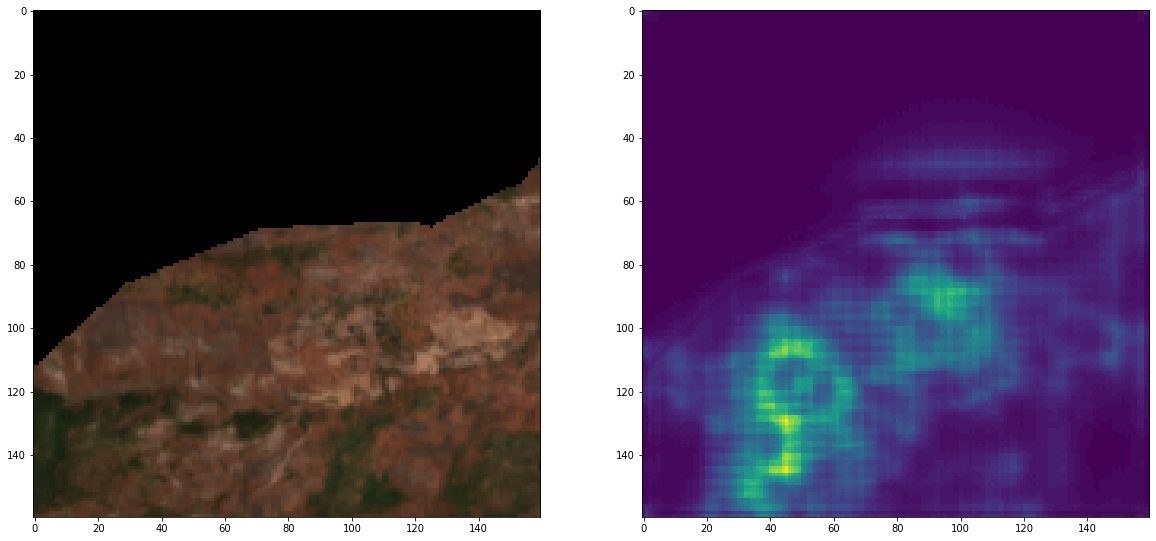

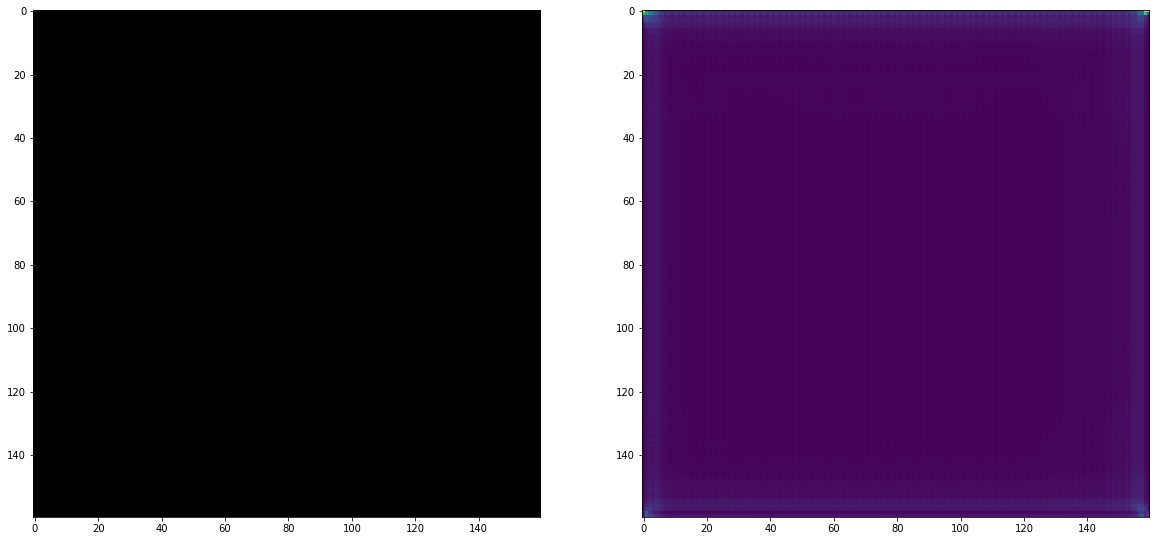

In [27]:
plot_data_results(num_samples=2, fig_size=(2, 2), predict_config=predict_config)#, img_ch =2, n_bands=3)

In [25]:
vrt_path  =  f'{BASE_PATH}dataset/data_results/{ZONE}_{YEAR_PREDICT}_{str(SIZE)}_{str(STEP_SIZE)}.vtr'
tif_path  =  f'{BASE_PATH}dataset/data_results/{ZONE}_{YEAR_PREDICT}_{str(SIZE)}_{str(STEP_SIZE)}.tif'
filenames = glob.glob(f'{predict_config.results_path}/*tif')

with open('tmp_list.txt', 'w') as f:
    for line in filenames:
        f.write(line)
        f.write('\n')

!gdalbuildvrt -input_file_list tmp_list.txt $vrt_path

!rm tmp_list.txt

!gdal_translate -of GTiff -co COMPRESS=DEFLATE -co PREDICTOR=2 -co ZLEVEL=9 $vrt_path $tif_path
    

0...10...20...30...40...50...60...70...80...90...100 - done.
Input file size is 12726, 20721
0...10...20...30...40...50...60...70...80...90...100 - done.
